In [1]:
pip install opencv-python

In [2]:
import numpy as np
import pandas as pd
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
from tensorflow.keras import utils  # to_categorical
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import random
import os
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
import cv2

In [3]:
FAST_RUN = True
IMAGE_WIDTH=128
IMAGE_HEIGHT=128
IMAGE_SIZE=(IMAGE_WIDTH, IMAGE_HEIGHT)
IMAGE_CHANNELS=3

In [10]:
file_path = r'C:\Users\Tanvi Shinde\Downloads\extract c&d\train'

In [11]:
filenames = os.listdir(file_path)
categories = []
for filename in filenames:
    category = filename.split('.')[0]
    print(category)
    if category == 'dog':
        categories.append(1)
    else:
        categories.append(0)

df = pd.DataFrame({
    'filename': filenames,
    'category': categories
})

cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
dog
dog
dog
dog
dog
dog
dog
dog
dog
dog
dog
dog
dog
dog
dog
dog
dog
dog
dog
dog
dog
dog
dog
dog
dog
dog
dog
dog
dog
dog
dog
dog
dog
dog
dog
dog
dog
dog
dog
dog
dog
dog
dog
dog
dog
dog
dog
dog
dog


In [12]:
df.head()

,filename,category
0,cat.0.jpg,0
1,cat.1.jpg,0
2,cat.10.jpg,0
3,cat.100.jpg,0
4,cat.101.jpg,0


<Axes: >

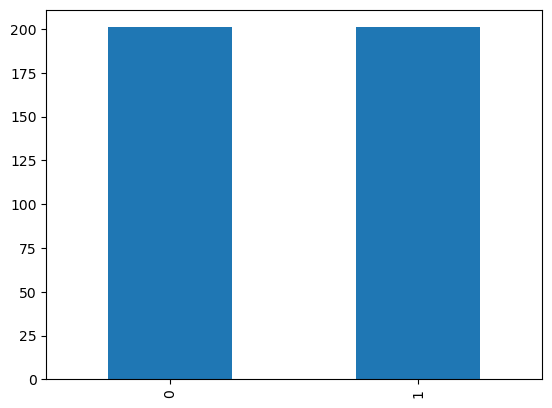

In [13]:
df['category'].value_counts().plot.bar()

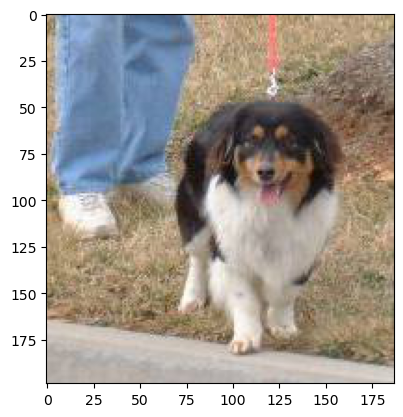

In [44]:
sample = random.choice(filenames)

image = load_img('train/' + sample)
plt.imshow(image)

In [45]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, Activation, BatchNormalization

model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(IMAGE_WIDTH, IMAGE_HEIGHT, IMAGE_CHANNELS)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(2, activation='softmax')) # 2 because we have cat and dog classes

model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 32)      896       
                                                                 
 batch_normalization (Batch  (None, 126, 126, 32)      128       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 63, 63, 32)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 63, 63, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 61, 61, 64)        18496     
                                                                 
 batch_normalization_1 (Bat  (None, 61, 61, 64)        2

In [14]:
earlystop = EarlyStopping(patience=10)

learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy',
                                            patience=2,
                                            verbose=1,
                                            factor=0.5,
                                            min_lr=0.00001)

callbacks = [earlystop, learning_rate_reduction]

In [15]:
df["category"] = df["category"].replace({0: 'cat', 1: 'dog'})

In [16]:
train_df, validate_df = train_test_split(df, test_size=0.20, random_state=42)
train_df = train_df.reset_index(drop=True)
validate_df = validate_df.reset_index(drop=True)

<Axes: >

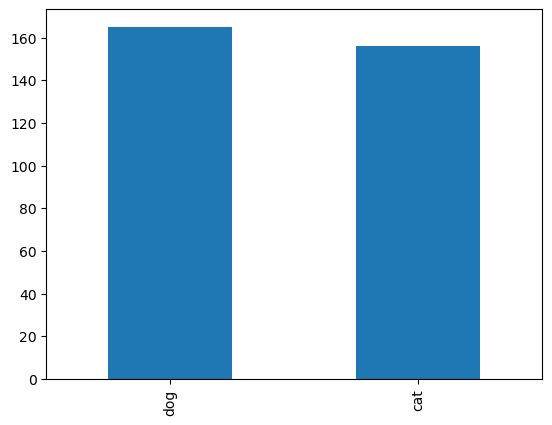

In [17]:
train_df['category'].value_counts().plot.bar()

<Axes: >

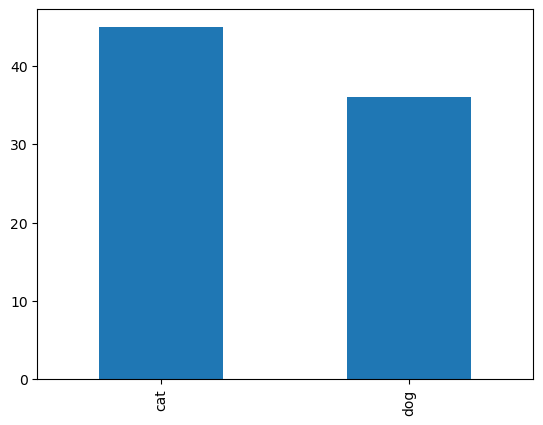

In [18]:
validate_df['category'].value_counts().plot.bar()

In [19]:
total_train = train_df.shape[0]
total_validate = validate_df.shape[0]
batch_size=15

In [20]:
train_datagen = ImageDataGenerator(
    rotation_range=15,
    rescale=1./255,
    shear_range=0.1,
    zoom_range=0.2,
    horizontal_flip=True,
    width_shift_range=0.1,
    height_shift_range=0.1
)

train_generator = train_datagen.flow_from_dataframe(
    train_df,
    "train/",
    x_col='filename',
    y_col='category',
    target_size=IMAGE_SIZE,
    class_mode='categorical',
    batch_size=batch_size
)

Found 0 validated image filenames belonging to 0 classes.


C:\Users\Tanvi Shinde\anaconda3\Lib\site-packages\keras\src\legacy\preprocessing\image.py:920: UserWarning: Found 321 invalid image filename(s) in x_col="filename". These filename(s) will be ignored.
  warnings.warn(


In [53]:
validation_datagen = ImageDataGenerator(rescale=1./255)

validation_generator = validation_datagen.flow_from_dataframe(
    validate_df,
    "train/",
    x_col='filename',
    y_col='category',
    target_size=IMAGE_SIZE,
    class_mode='categorical',
    batch_size=batch_size
)

Found 81 validated image filenames belonging to 2 classes.


In [21]:
example_df = train_df.sample(n=1).reset_index(drop=True)
example_generator = train_datagen.flow_from_dataframe(
    example_df,
    "train/",
    x_col='filename',
    y_col='category',
    target_size=IMAGE_SIZE,
    class_mode='categorical'
)

Found 0 validated image filenames belonging to 0 classes.


C:\Users\Tanvi Shinde\anaconda3\Lib\site-packages\keras\src\legacy\preprocessing\image.py:920: UserWarning: Found 1 invalid image filename(s) in x_col="filename". These filename(s) will be ignored.
  warnings.warn(


IndexError: index 0 is out of bounds for axis 0 with size 0

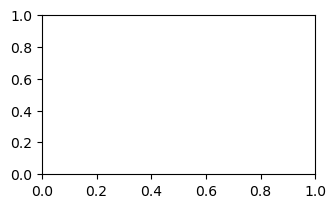

In [22]:
plt.figure(figsize=(12, 12))
for i in range(0, 15):
    plt.subplot(5, 3, i+1)
    for X_batch, Y_batch in example_generator:
        image = X_batch[0]
        plt.imshow(image)
        break
plt.tight_layout()
plt.show()

In [56]:
epochs=3 if FAST_RUN else 50
history = model.fit_generator(
    train_generator,
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=total_validate//batch_size,
    steps_per_epoch=total_train//batch_size,
    callbacks=callbacks
)
model.save("model.h5")

Epoch 1/3


/var/folders/vk/jd_wwq916k9bxddqlnbxqrv80000gn/T/ipykernel_34278/3521830830.py:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(


21/21 [==============================] - 4s 149ms/step - loss: 1.8425 - accuracy: 0.5784 - val_loss: 1.2232 - val_accuracy: 0.4800 - lr: 0.0010
Epoch 2/3
21/21 [==============================] - 3s 150ms/step - loss: 1.4713 - accuracy: 0.5065 - val_loss: 0.8892 - val_accuracy: 0.5867 - lr: 0.0010
Epoch 3/3
21/21 [==============================] - 3s 141ms/step - loss: 1.1737 - accuracy: 0.5817 - val_loss: 1.4234 - val_accuracy: 0.4933 - lr: 0.0010


/Users/vivekgupta/anaconda3/lib/python3.11/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
for i in range(10):
    all_test_images = os.listdir('test')
    random_image = random.choice(all_test_images)
    img = cv2.imread(f'test/{random_image}')
    img = cv2.resize(img,(IMAGE_HEIGHT,IMAGE_WIDTH))

    org = img.copy()
    img = img.reshape(1,128,128,3)

    pred = model.predict(img)
    print(['cat','dog'][int(pred[0][0])])
    cv2.imshow('Live predictions',org)
    cv2.waitKey(0)
cv2.destroyAllWindows()